In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [5]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.07268607, -0.0826557 ,  0.34043108, -0.8710055 , -0.9090494 ,
        -0.10999424, -1.19624917, -0.43553912,  0.75647792,  0.06083212],
       [-0.53511926, -0.68861657, -0.73810226,  0.7421594 ,  1.07813896,
         0.42064442,  0.43789393,  0.7093749 ,  0.78559342,  0.7596803 ]])

In [6]:
test_Features[:2]

array([[-6.99200615e-01, -2.67087103e-01, -6.10294896e-01,
        -2.67641351e-01, -1.14536022e-01,  1.49592418e-01,
         1.21880475e-01, -2.60601827e-01,  3.02070761e-02,
        -1.35341235e-01],
       [-8.45790595e-01, -7.68199797e-01, -7.45296715e-01,
         2.02656468e+00,  3.28250637e+00,  5.56603780e-02,
         3.68548412e-03,  4.27494140e-01,  4.58519076e-01,
         5.88433529e-04]])

In [7]:
train_Label[:4]

array([1, 0, 1, 1])

In [8]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [9]:
train_Features.shape

(12743, 10, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [11]:
model = Sequential()

In [12]:
model.add(Conv1D(filters=10,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(10, activation='tanh'))

In [16]:
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 10)             40        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 10)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 2s 173us/step - loss: 0.6801 - acc: 0.5688 - val_loss: 0.6255 - val_acc: 0.6775
Epoch 2/30
10194/10194 [==============================] - 0s 41us/step - loss: 0.5882 - acc: 0.7008 - val_loss: 0.5628 - val_acc: 0.7332
Epoch 3/30
10194/10194 [==============================] - 0s 43us/step - loss: 0.5333 - acc: 0.7516 - val_loss: 0.5217 - val_acc: 0.7595
Epoch 4/30
10194/10194 [==============================] - 0s 40us/step - loss: 0.4959 - acc: 0.7679 - val_loss: 0.4907 - val_acc: 0.7725
Epoch 5/30
10194/10194 [==============================] - 0s 41us/step - loss: 0.4678 - acc: 0.7880 - val_loss: 0.4664 - val_acc: 0.7858
Epoch 6/30
10194/10194 [==============================] - 0s 45us/step - loss: 0.4471 - acc: 0.7992 - val_loss: 0.4471 - val_acc: 0.7972
Epoch 7/30
10194/10194 [==============================] - 0s 32us/step - loss: 0.4312 - acc: 0.8096 - val_loss: 0.4333 - val_acc

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

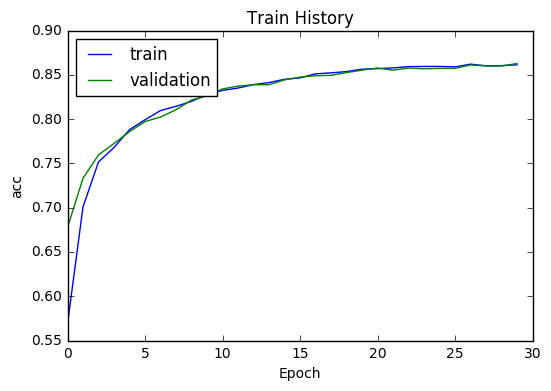

In [21]:
show_train_history(train_history,'acc','val_acc')

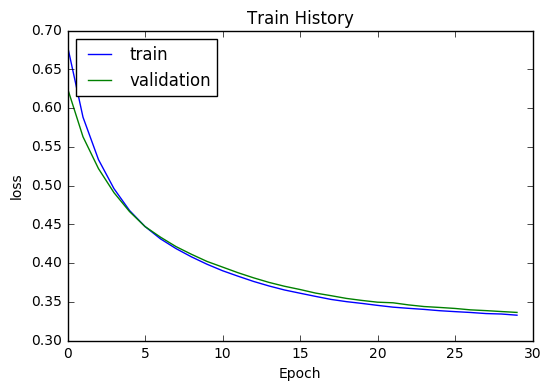

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 85us/step


In [24]:
scores[1]

0.8591683925537047